# julia
2012年产生

https://www.bilibili.com/video/av28248187/?spm_id_from=333.788.videocard.1

https://www.bilibili.com/video/av47775635?p=2

https://julialang.org/

https://github.com/JuliaLang/julia

## 缺点
基于JIT(just-in-time，即时编译器，启动有预热时间，不适合小规模、只运行一次的任务)

## REPL : 
Read Eval Print Loop ： 交互式解释器。表示电脑的一个环境，类似Windows 系统的终端或Unix/Linux shell，我们可以在终端中输入命令，并接收系统的响应。

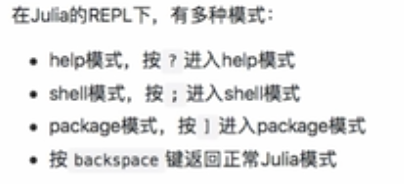

### help模式
相当于在Julia模式下面输入 @doc command

### pkg模式
add IJulia
相当于在Julia模式下面输入 

using Pkg

Pkg.add("IJulia")

删除包

rm IJulia

查看现在已安装的包

Pkg.installed()

Pkg.update()

add IJulia PyCall



add JuliaZH

using IJulia

IJulia.notebook()

# 基本语法

## 变量
无需声明，直接赋值
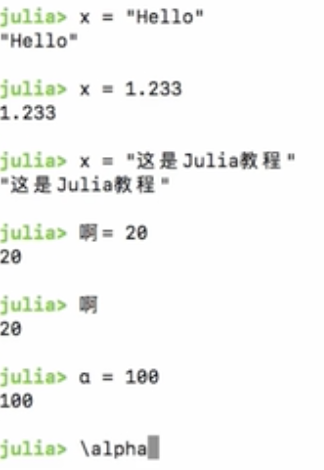

### 命名规范
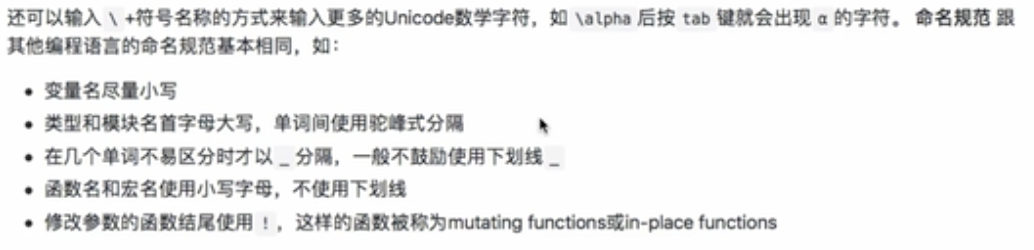

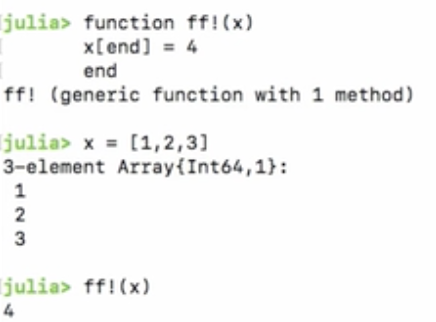

## 整数
### 整数类型
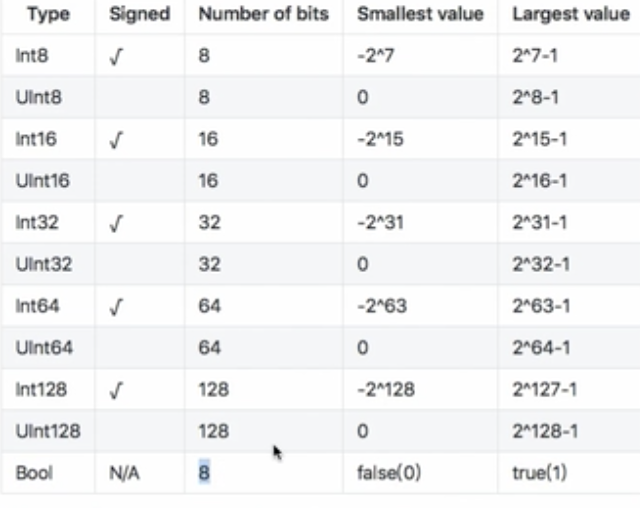

In [9]:
a = 2
typeof(a)

Int64

In [10]:
# ans表示上一次的运行结果
typeof(ans)

DataType

In [11]:
ans

DataType

In [12]:
# 查看父类型
supertype(Int64)

Signed

In [14]:
# 查看子类型
subtypes(Signed)

6-element Array{Any,1}:
 BigInt
 Int128
 Int16 
 Int32 
 Int64 
 Int8  

In [15]:
# 查看占用字节数
sizeof(1)  # 1默认是Int64类型

8

In [16]:
sizeof(Int16(1))

2

### 十六进制
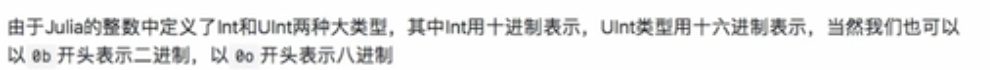

In [20]:
a = 10
UInt8(a)

0x0a

In [22]:
a = 0b1010
Int64(a)

10

## 浮点数
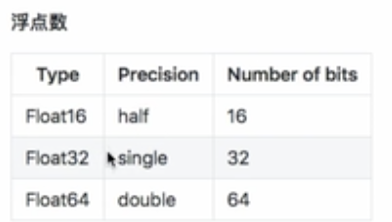

In [17]:
a = 1.1
typeof(a)

Float64

In [23]:
1e-3

0.001

In [24]:
typeof(1e-3)

Float64

In [25]:
1f-3

0.001f0

In [26]:
typeof(1f-3)

Float32

In [27]:
function showTypeTree(T, level = 0)
    println("\t"^level, T)
    for t in subtypes(T)
        if t != Any
            showTypeTree(t, level+1)
        end
    end
end

showTypeTree (generic function with 2 methods)

In [28]:
showTypeTree(Real)

Real
	AbstractFloat
		BigFloat
		Float16
		Float32
		Float64
	AbstractIrrational
		Irrational
	Integer
		Bool
		Signed
			BigInt
			Int128
			Int16
			Int32
			Int64
			Int8
		Unsigned
			UInt128
			UInt16
			UInt32
			UInt64
			UInt8
	Rational


## 复数

In [29]:
x = 1 + 2im

1 + 2im

In [30]:
x + x

2 + 4im

In [31]:
x - x

0 + 0im

In [32]:
x ^ 2

-3 + 4im

In [33]:
2x

2 + 4im

In [34]:
2 * x

2 + 4im

In [35]:
z = complex(1, 2)

1 + 2im

In [36]:
real(z), imag(z)

(1, 2)

In [37]:
angle(z)

1.1071487177940904

## 分数

In [38]:
2//3

2//3

In [39]:
# 自动约分
4 // 8

1//2

In [40]:
# 取出分子
numerator(2//3)

2

In [42]:
# 取出分母
denominator(2//3)

3

In [43]:
float(2//3)

0.6666666666666666

In [44]:
isequal(float(2//3), 2//3)

false

## 字符串 & 字符

In [45]:
x = 'a'
Int(x)

97

In [46]:
Char(97)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [47]:
s = "hello world!"

"hello world!"

In [50]:
# 索引从1开始
s[1]

'h': ASCII/Unicode U+0068 (category Ll: Letter, lowercase)

In [51]:
s[end]

'!': ASCII/Unicode U+0021 (category Po: Punctuation, other)

In [52]:
s[end-3: end]

"rld!"

In [54]:
s[1:3]  # 索引切片时 含头含尾！！！

"hel"

### 字符串操作

In [55]:
a = "hello"
b = "world"

"world"

In [57]:
a * ',' * b

"hello,world"

In [58]:
"$a , $b"

"hello , world"

In [59]:
a ^ 3

"hellohellohello"

In [60]:
uppercase(a)

"HELLO"

In [61]:
lowercase(ans)

"hello"

In [62]:
replace("I want learn python", "python"=>"julia")

"I want learn julia"

In [63]:
replace("abcdcd", 'c'=>'h')

"abhdhd"

In [64]:
startswith("I want learn python", "python")

false

In [65]:
startswith("I want learn python", "I")

true

In [68]:
split("I want learn python")

4-element Array{SubString{String},1}:
 "I"     
 "want"  
 "learn" 
 "python"

In [69]:
join(ans, ", ", " and ")

"I, want, learn and python"

In [70]:
strip("  hello world!  ")

"hello world!"

In [71]:
"""Hello,
world"""

"Hello,\nworld"

In [72]:
"""
Hello,
world"""

"Hello,\nworld"

In [73]:
"""
Hello,
world
"""

"Hello,\nworld\n"

In [75]:
findfirst(isequal('x'), "index")

5

In [76]:
findnext(isequal('x'), "xindex", 2)

6

In [77]:
findall(isequal('x'), "xindex")

2-element Array{Int64,1}:
 1
 6

In [79]:
repeat('a', 10)

"aaaaaaaaaa"

In [78]:
repeat("ab", 10)

"abababababababababab"

In [80]:
length("ab")

2

### 正则表达式

In [81]:
a = r"\s+"

r"\s+"

In [82]:
typeof(a)

Regex

In [83]:
# 判断正则表达式是否出现在后面的表达式中
occursin(a, "abc")

false

In [84]:
occursin(a, "a b")

true

In [85]:
match(a, "a b")

RegexMatch(" ")

In [86]:
match(r"[1-9]", "a2b4cdg")

RegexMatch("2")

In [87]:
match(r"[1-9]", "a2b4cdg", 1)

RegexMatch("2")

In [89]:
match(r"[1-9]", "a2b4cdg", 3)

RegexMatch("4")

In [2]:
# 字符串用双引号，字符用单引号
println("hello world!")

hello world!


In [3]:
@show "hello world"
@show("hello world")

"hello world" = "hello world"
"hello world" = "hello world"


"hello world"

## 定义函数

In [4]:
function mysum(A)
    s = 0.0
    for a in A
        s += a
    end
    s
end

mysum (generic function with 1 method)

In [5]:
A = rand(1000)
A

1000-element Array{Float64,1}:
 0.2548028063448504  
 0.40059546096897014 
 0.5717236035266728  
 0.2656641254042529  
 0.8131214494242494  
 0.3412361592870681  
 0.1279468177340406  
 0.3429536157495694  
 0.34602598773150794 
 0.6479460985303334  
 0.37703762920975525 
 0.3472941435917627  
 0.9661330594177655  
 ⋮                   
 0.14082582641696173 
 0.3852992397400212  
 0.2651940233574124  
 0.1211440207168264  
 0.1704369346067336  
 0.847577268849171   
 0.5622519718757601  
 0.30181789174321816 
 0.940916177981588   
 0.35841775961769784 
 0.004107791135439909
 0.028264726020811537

In [6]:
mysum(A)

499.2294466998278

## 函数注释

In [19]:
"""
    is_even(x::Int) -> Bool  

判断一个整数`x`是否是偶数
```math
\\epsilon
```
"""
is_even(x::Int) = x%2 == 0

is_even

In [20]:
?is_even

search: is_even



```
is_even(x::Int) -> Bool
```

判断一个整数`x`是否是偶数

$$
\epsilon
$$


In [21]:
@doc is_even

```
is_even(x::Int) -> Bool
```

判断一个整数`x`是否是偶数

$$
\epsilon
$$


In [8]:
function sum_even(A)
    s = 0.0
    for i in eachindex(A)
        if is_even(i)
            s += A[i]
        end
    end
    s
end

sum_even (generic function with 1 method)

In [9]:
sum_even(A)

247.1445184814199

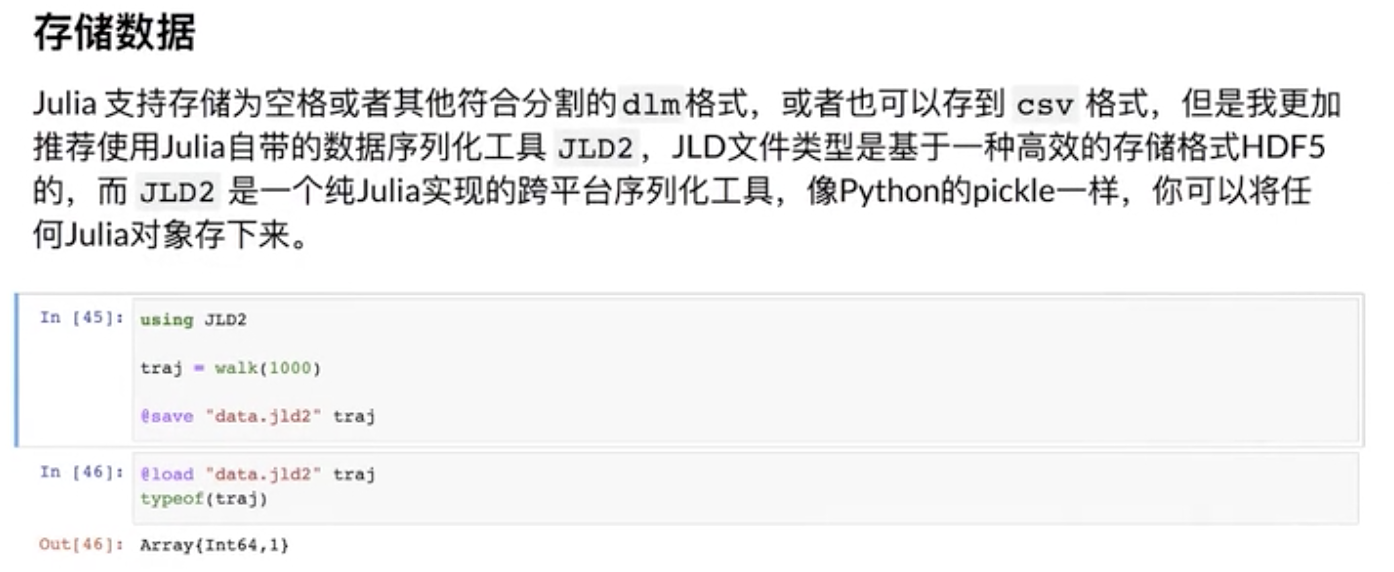

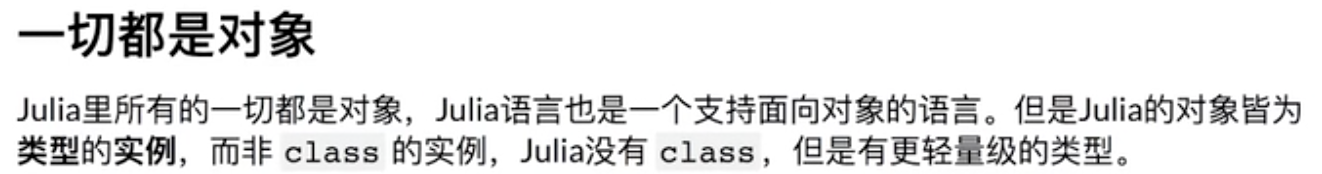